# Assignment 3

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Deploy Instructions for Dashboard
  - The data file is publicly available on Kaggle.com. See <b>Dataset</b> section for the source URL.
  - According to the current configuration, the data file, <b>kc_house_data.csv</b>, should be placed in the same directory as this assignment3.ipynb notebook. If a different path is desired, locate the notebook cell and modify the "<b>new_path</b>" to the data file as shown in the following code as needed: house_data = pd.read_csv('<b>new_path</b>/kc_house_data.csv')
  - Install Seaborn and Ipywidgets libraries if needed. Install instructions are provided under the <b>Visualization Library</b> section.
  - Image files, <b>Navigator1.png</b> through <b>Navigator7.png</b>, should be placed in the same directory as this assignment3.ipynb notebook.

## Dataset
The data, kc_house_data.csv, used in this assignment is publicly available at https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?resource=download. 
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.



## Visualization Technique

In this assignment, the following visualization types are included as part of exploratory data analysis (EDA) of the housing dataset:
1. Horizontal bar chart (matplotlib.pyplot) - To view distribution of bedrooms and compare with seaborn histogram using the same data.
2. Histogram (seaborn) with kde option - To display a smoothed probability density function (PDF) curve on top of the traditional bar-based histogram of bedrooms. This is to compare the look and feel of seaborn histogram with the horizontal bar chart (matplotlib.pyplot) from the previous step.
3. Scatter plot (seaborn) - To visualize the relationship between 'price', 'sqft_living', and 'grade'.
4. Box plot (seaborn) - To see the trend and distribution of 'grad' over 'yr_built'.
5. Line plot (seaborn) - To see the trend of number of bedrooms over time ('yr_built').
6. Pair plot (seaborn) - To visualize relationship pattern between 'bedrooms','bathrooms','sqft_living','yr_built', and 'price' as well as the distribution of each variable displayed diagonally.
7. Heat map (seaborn) - To quickly identify areas of high or low activity, patterns, and trends a small subset of variables of interest, making complex information more easily understandable. The second heat map included more variables for a bigger picture.
8. Static dashboard on a 2x2 grid with the following components:
    - Histogram (distribution of grade)
    - Scatter plot (relationship between 'grade', 'price', 'sqft_living')
    - Box plot (grade distribution over year built)
    - Line plot (bedrooms distribution over year built)
9. Parameterized interactive dashboard using ipywidgets and IPython.display on a 2x2 grid with the following components:
    - Year built integer range slider
    - Histogram dropdown
    - Scatter_x, scatter_y, hue dropdowns for scatter plot
    - Box_x, box_y dropdowns for box plot
    - Line_x, line_y dropdowns for line plot
    - Histogram plot
    - Scatter plot
    - Box plot
    - Line plot

<b>Notes:</b>
Reusable visualization functions for histograms, scatter plots, boxplots, line plots, dashboard, interactive dashboard from "IpywidgetsDashboard.ipynb" example were used in this assignment with and without code modification.


## Visualization Library

#### Seaborn
Seaborn is a high-level, declarative, open-source Python library created by Michael Waskom, a neuroscientist and data visualization expert.  Seaborn extends Matplotlib, leveraging its capabilities while providing a more intuitive interface for statistical graphics. Seaborn is integrated seamlessly with Pandas and Jupyter notebooks allowing for easy plotting with minimal code. However, it offers limited interactivity and customization.

#### Ipywidgets
Ipywidgets are interactive elements that enable user interaction within Jupyter notebooks and the IPython kernel. They allow users to specify parameter values in notebook cells, creating dynamic and responsive interfaces. Ipywidgets offers a declarative, notebook-native, open-source way to add UI interactivity in Python workflows, especially within Jupyter. It’s simple and powerful for small to medium tasks, but not a replacement for full web frameworks when more advanced interaction or deployment is required. Ipywidgets is limited by its strong dependence on Jupyter environments, making it hard to use outside notebooks. Custom styling and layout control are somewhat restricted, and performance can degrade with many widgets or frequent updates or large datasets. With a small learning curve, ipywidgets is suitable for teaching, demos, and parameter sweeps. 

##### Install from a Jupyter notebook: 
!pip install seaborn ipywidgets

##### Install from bash:
pip install seaborn ipywidgets

##### Install if using conda:
conda install seaborn ipywidgets

##### Install from Anaconda Navigator:
Click on Environments tab and search for "ipywidgets" or "seaborn" using the search box located in the top-right corner of the Navigator screen. Check boxes will appear unchecked for packages that have not been installed. Check the box in front of the desired packages and click "Apply" as needed.

#### Anaconda Navigator Screenshot Examples
##### 1. Search for ipywidgets (already installed)<br>
![ipywidgets](Navigator1.png)

##### 2. Search for seaborn (already installed)<br>
![seaborn](Navigator2.png)

##### 3. Search for plotly components that have not been installed<br>
![plotly](Navigator3.png)

##### 4. Select package(s) to install<br>
![plotlychecked](Navigator4.png)

##### 5. Click Apply<br>
![plotlyapply](Navigator5.png)

##### 6. Click Apply again<br>
![plotlyconfirm](Navigator6.png)

##### 7. Installation is completed.<br>
![plotlycomplete](Navigator7.png)



In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, Dropdown, IntRangeSlider
from IPython.display import display, clear_output # Required for display update of the interactive dashboard


In [3]:
# Load dataset
house_data = pd.read_csv('kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Check column names
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# Check data type and count
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# Check for null values if needed
house_data[house_data['price'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [7]:
# View quick stats
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64


Text(0.5, 1.0, 'Bedrooms vs. Count')

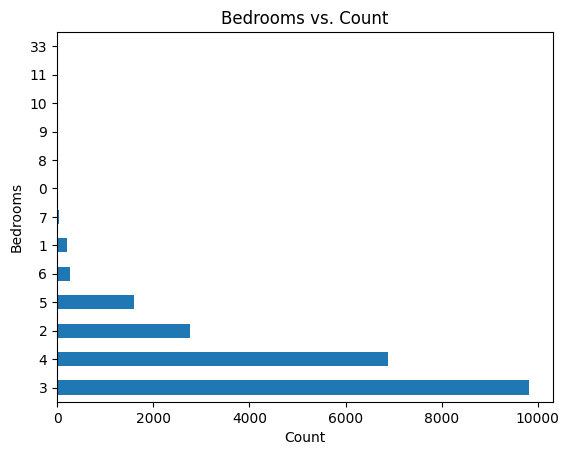

In [8]:
# Plot bar chart
bedroom_counts = house_data['bedrooms'].value_counts()
print(bedroom_counts)

# Horizontal
bedroom_counts.plot(kind='barh', x='bedrooms', y='count', legend=False) 
plt.xlabel("Count")
plt.ylabel("Bedrooms")
plt.title("Bedrooms vs. Count")

# Vertical
# bedroom_counts.plot(kind='bar', x='bedrooms', y='count', legend=False) 
# plt.xlabel("Bedrooms")
# plt.ylabel("Count")
# plt.title("Bedrooms vs. Count")

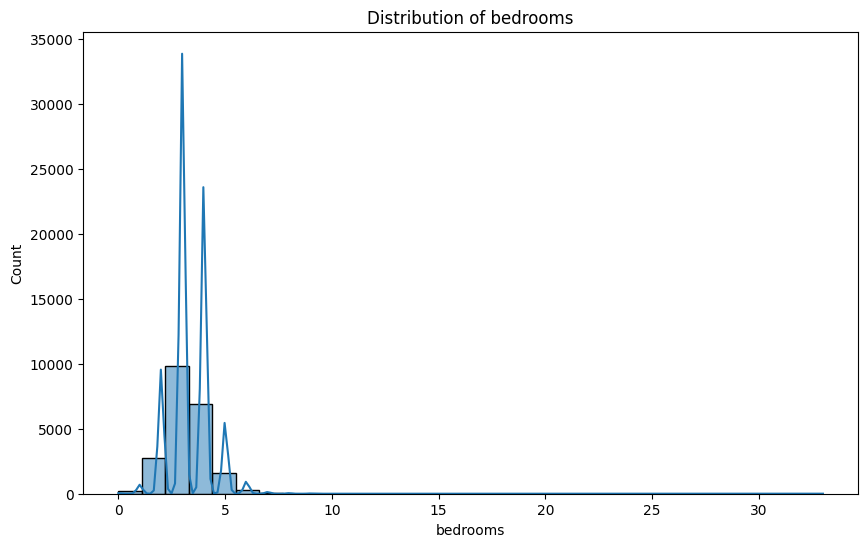

In [9]:
# This function is from IpywidgetsDashboard.ipynb example.

def create_histogram(data, column, bins=30, kde=True, title=None):
    plt.figure(figsize=(10,6))
    sns.histplot(data=data, x=column, kde=kde, bins=bins)
    plt.title(title or f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

create_histogram(house_data, 'bedrooms')
plt.show()
               

Most houses have 3, 4, and 2 bedrooms, respectively. There is one house having 33 bedrooms!

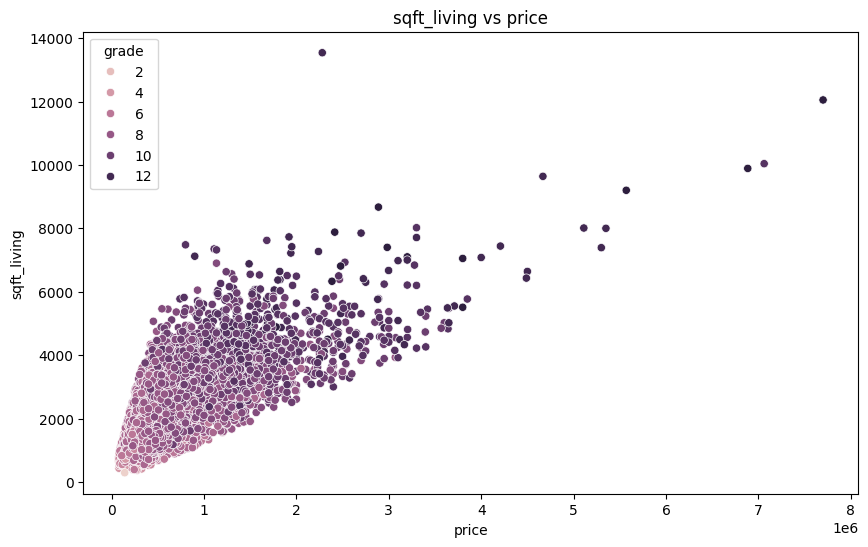

In [10]:
# This function is from IpywidgetsDashboard.ipynb example.

def create_scatter(data, x_col, y_col, hue_col=None, title=None):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=data, x=x_col, y=y_col, hue=hue_col)
    plt.title(title or f'{y_col} vs {x_col}')

create_scatter(house_data, 'price', 'sqft_living', 'grade')
plt.show()

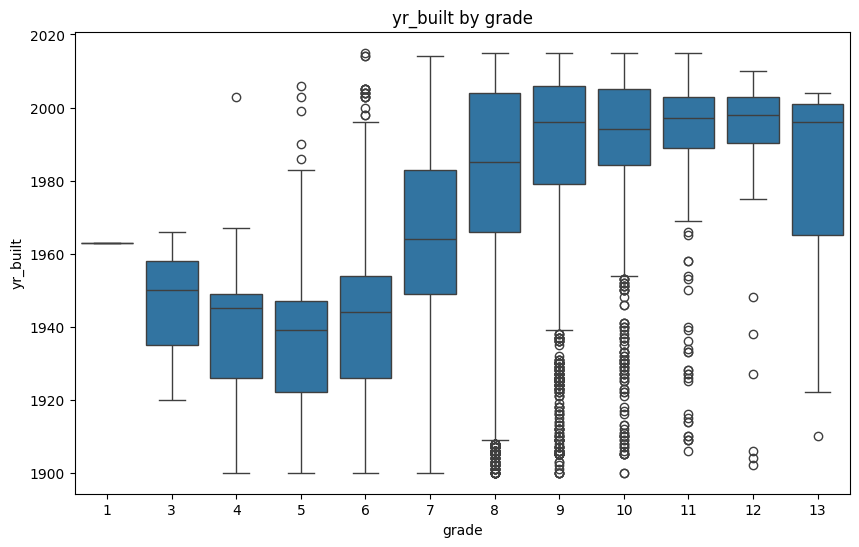

In [11]:
# This function is from IpywidgetsDashboard.ipynb example.

def create_boxplot(data, x_col, y_col, title=None):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=data, x=x_col, y=y_col)
    plt.title(title or f'{y_col} by {x_col}')

create_boxplot(house_data, 'grade', 'yr_built')
plt.show()

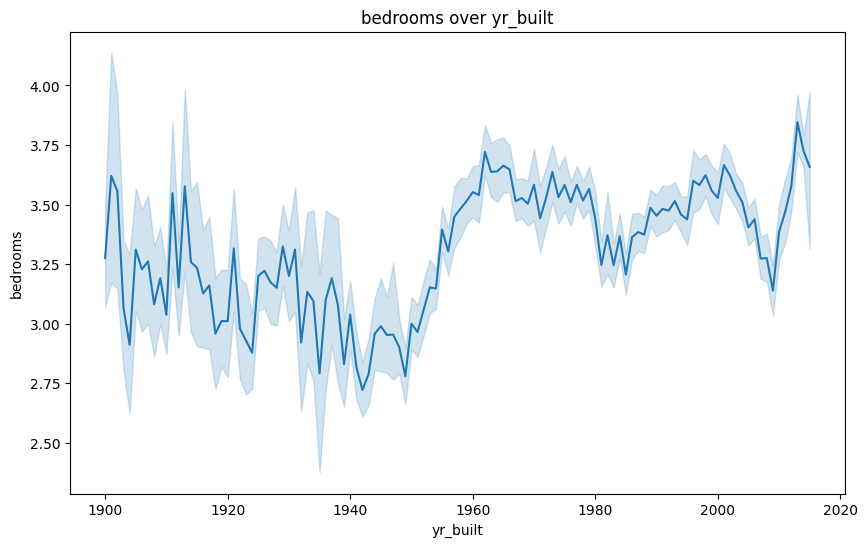

In [12]:
# This function is from IpywidgetsDashboard.ipynb example.

def create_lineplot(data, x_col, y_col, title=None):
    plt.figure(figsize=(10,6))
    sns.lineplot(data=data, x=x_col, y=y_col)
    plt.title(title or f'{y_col} over {x_col}')

create_lineplot(house_data, 'yr_built', 'bedrooms')
plt.show()

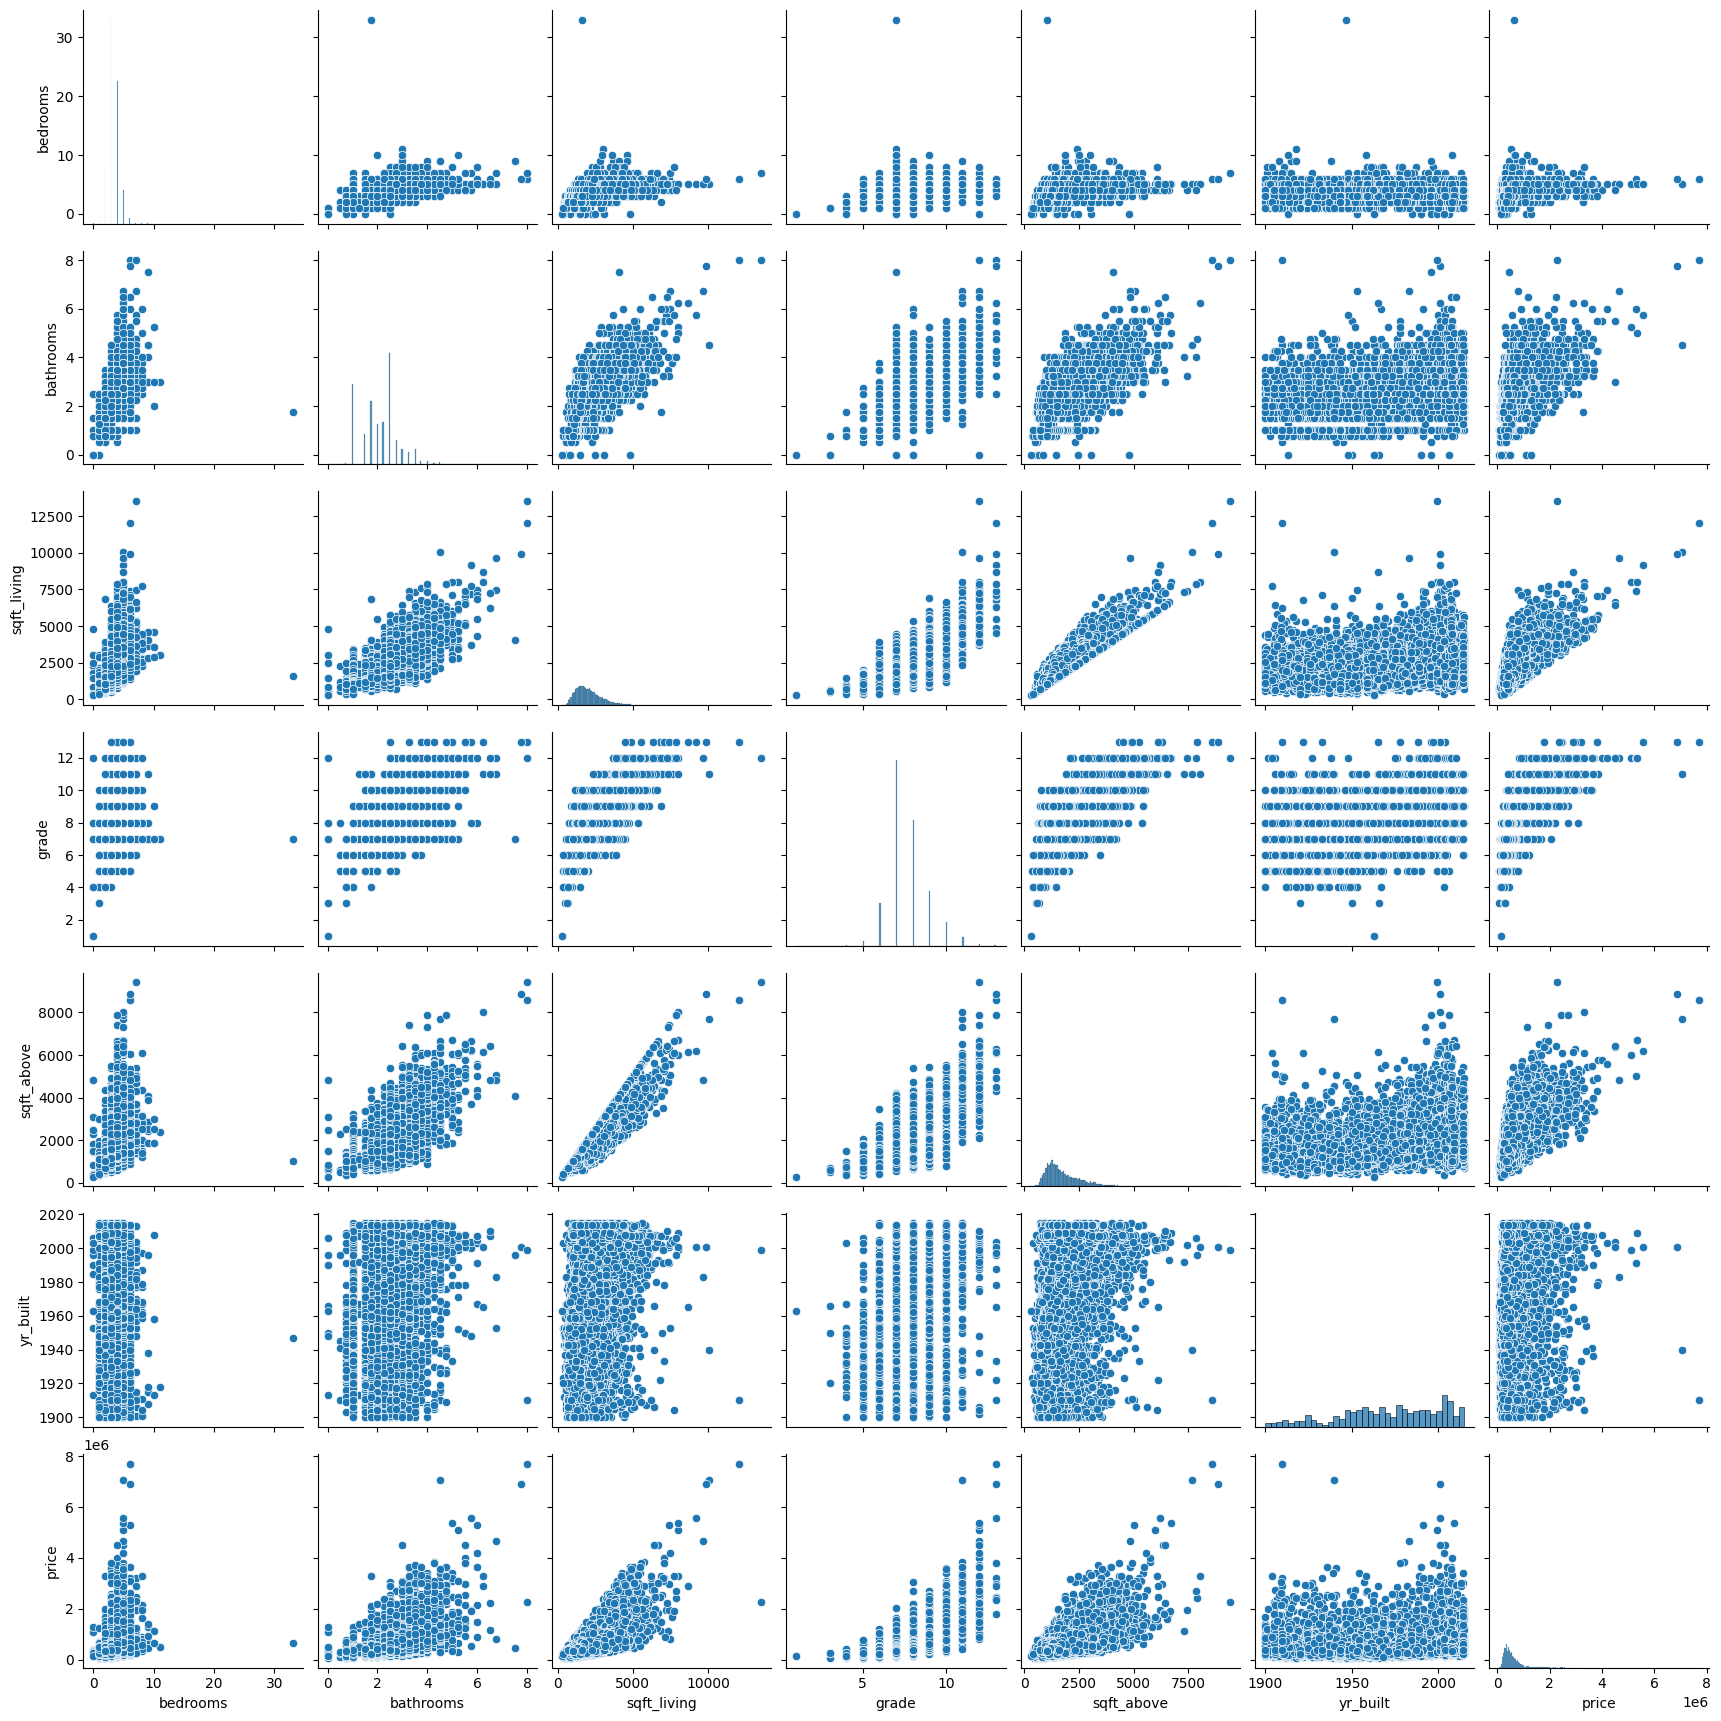

In [13]:
# Create pariplot using seaborn

price_compare = house_data[['bedrooms','bathrooms','sqft_living','grade','sqft_above','yr_built','price']]
sns.pairplot(price_compare)

The plots of the sold price and bathrooms appear to form a linear relationship, reinforcing the observation of high correlation between the pair. There are some outliers when sold price and number of bathrooms are high. The plots of bedrooms and bathrooms appear to show a linear relationship and some outliers as well. The plots of sold price and bedrooms displays a weaker correlation compared to other pairs.

<Axes: >

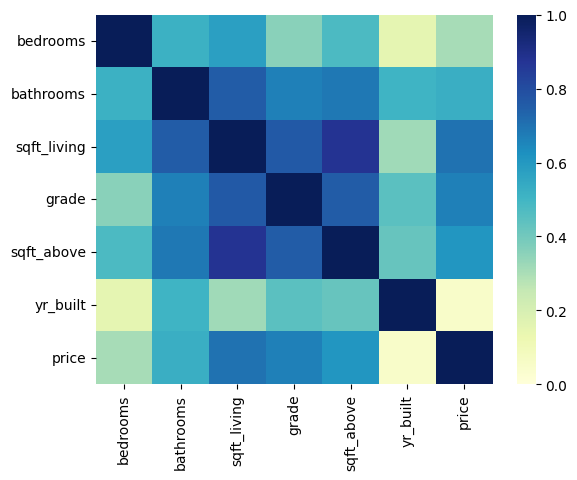

In [14]:
# Create seaborn heatmap for a small subset of variables
# Color options: 'viridis', 'coolwarm', 'YlGnBu', 'Blues', 'magma', 'inferno', 'plasma' 
sns.heatmap(price_compare.corr(), vmin=0, vmax=1, cmap='YlGnBu')

In [15]:
# Optional step for column selection
# features = house_data[['date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_basement','yr_built','yr_renovated','zipcode','lat','long']]
features = house_data
features['sold_year'] = pd.to_datetime(features['date']).dt.year 
features = features.drop(['id','date'], axis=1) 
features.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


<Axes: >

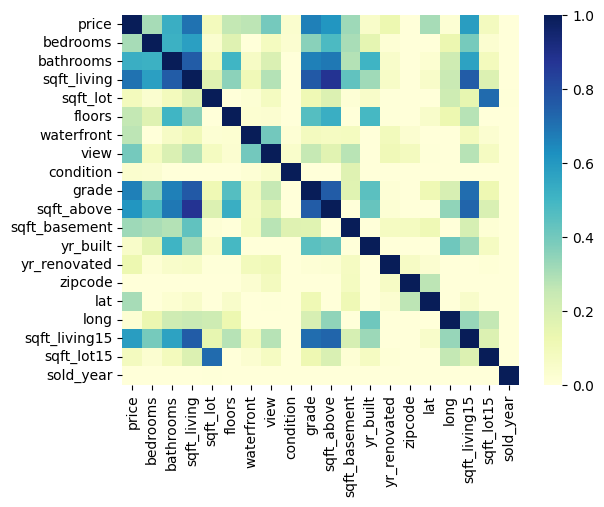

In [16]:
# Display selected variables on the heatmap

sns.heatmap(features.corr(), vmin=0, vmax=1, cmap='YlGnBu')


Testing our static dashboard:


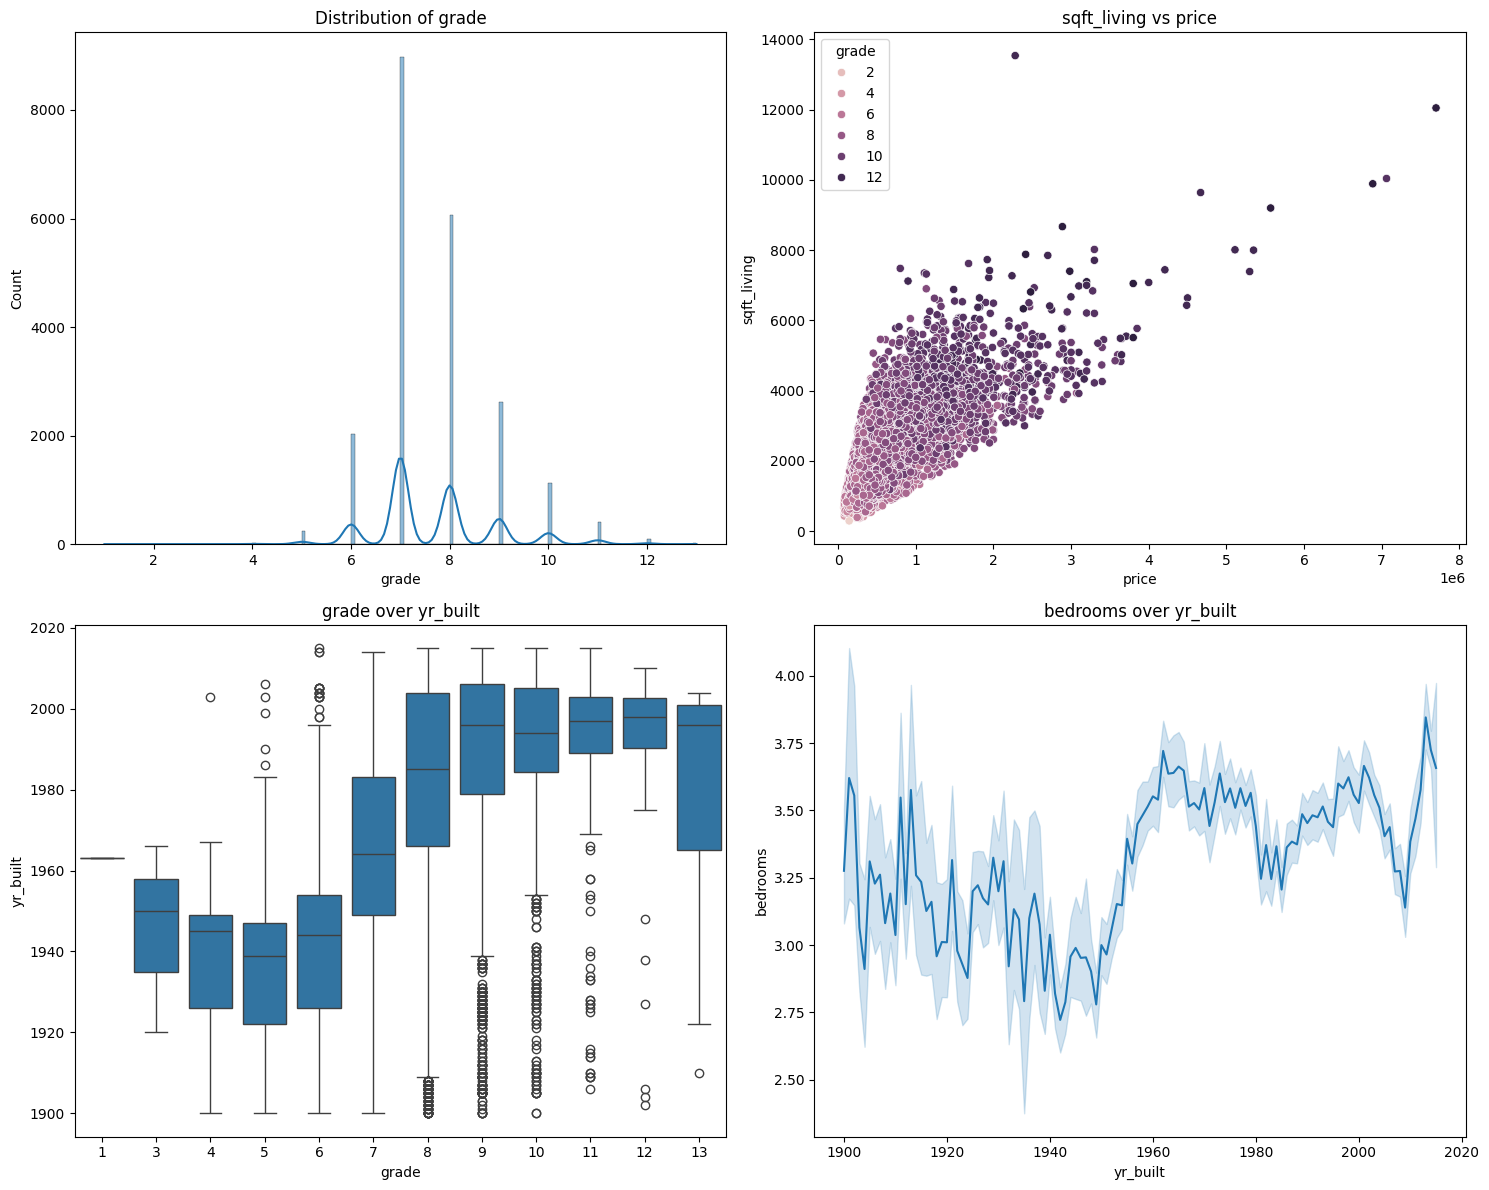

In [17]:
# This function is from IpywidgetsDashboard.ipynb example with hue parameter added for scatter plot.

def create_dashboard(data, hist_col, scatter_x, scatter_y, hue, 
                    box_x, box_y, line_x, line_y):
    """
    Creates a dashboard combining all our plot types except the heat maps.

    Parameters:
    -----------
    data : pandas DataFrame
    The input dataset
    hist_col : str
        Column for histogram
    scatter_x, scatter_y, hue: str
        Columns for scatter plot
    box_x, box_y : str
        Columns for box plot
    line_x, line_y : str
        Columns for line plot
    """
    fig = plt.figure(figsize=(15, 12))
    gs = fig.add_gridspec(2, 2)

    # Histogram
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(data=data, x=hist_col, kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {hist_col}')

    # Scatter plot
    ax2 = fig.add_subplot(gs[0, 1])
    sns.scatterplot(data=data, x=scatter_x, y=scatter_y, hue=hue, ax=ax2)
    ax2.set_title(f'{scatter_y} vs {scatter_x}')

    # Box plot
    ax3 = fig.add_subplot(gs[1, 0])
    sns.boxplot(data=data, x=box_x, y=box_y, ax=ax3)
    ax3.set_title(f'{box_x} over {box_y}')

    # Line plot
    ax4 = fig.add_subplot(gs[1, 1])
    sns.lineplot(data=data, x=line_x, y=line_y, ax=ax4)
    ax4.set_title(f'{line_y} over {line_x}')

    plt.tight_layout()
    return fig

print("\nTesting our static dashboard:")
create_dashboard(house_data, 'grade', 'price', 'sqft_living', 'grade', 'grade', 'yr_built','yr_built', 'bedrooms')
plt.show()

In [18]:
# This function is from IpywidgetsDashboard.ipynb example.
# Changes implemented in this version:
# 1. Added data, hist_default_col, scatter_x_default, scatter_y_default, hue_col, box_x_col, box_y_col, line_x_col, line_y_col parameters to the create_interactive_dashboard() function.
# 2. Added option to remove certain columns by name. In this case, the 'id' column is filtered out.
# 3. Added dropdowns for hue, box_x, box_y, line_x, line_y.
# 4. Configured yr_built range value for year_range slider and moved the slider to the top of dashboard.


def create_interactive_dashboard(data, hist_default_col, scatter_x_default, scatter_y_default, hue_col, 
                    box_x_col, box_y_col, line_x_col, line_y_col):
    """Creates an interactive dashboard with widgets for controlling the display."""

    # First, let's explore widget creation and understand the syntax

    # Get numeric and categorical columns for our dropdown options
    numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = data.select_dtypes(include=[object]).columns.tolist()

    # Create a new numeric column list without the 'id' column since it is irrelevant for the dashboard
    numeric_cols = [col for col in numeric_columns if col not in ['id']]
    
    # Create a dropdown widget
    # - options: list of possible choices
    # - value: default/initial selection
    # - description: label shown next to widget
    # - style: dictionary of CSS-like styling options
    hist_dropdown = Dropdown(
        options=numeric_cols,        # List of numeric columns
        value=hist_default_col,                 # Default selection
        description='Histogram:',     # Widget label
        style={'description_width': 'initial'}  # Make label width dynamic
    )

    scatter_x = Dropdown(
        options=numeric_cols,
        value=scatter_x_default,
        description='Scatter X:',
        style={'description_width': 'initial'}
    )

    scatter_y = Dropdown(
        options=numeric_cols,
        value=scatter_y_default,
        description='Scatter Y:',
        style={'description_width': 'initial'}
    )

    hue_dropdown = Dropdown(
        options=numeric_cols,
        value=hue_col,
        description='Hue:',
        style={'description_width': 'initial'}
    )

    box_x_dropdown = Dropdown(
        options=numeric_cols,
        value=box_x_col,
        description='Box x:',
        style={'description_width': 'initial'}
    )

    box_y_dropdown = Dropdown(
        options=numeric_cols,
        value=box_y_col,
        description='Box y:',
        style={'description_width': 'initial'}
    )

    line_x_dropdown = Dropdown(
        options=numeric_cols,
        value=line_x_col,
        description='Line x:',
        style={'description_width': 'initial'}
    )

    line_y_dropdown = Dropdown(
        options=numeric_cols,
        value=line_y_col,
        description='Line y:',
        style={'description_width': 'initial'}
    )
    
    # Create a range slider for year selection
    # IntRangeSlider provides two handles for selecting a range
    year_range = IntRangeSlider(
        value=[1900, 2020],             # Default range
        min=1900,                     # Minimum value
        max=2020,                     # Maximum value
        step=1,                     # Step size
        description='Year Built:',        # Widget label
        continuous_update=False,     # Only update when user releases slider
        style={'description_width': 'initial'}
    )

    # The update function that will be called whenever a widget value changes
    # This function must accept parameters matching the widget names we'll use with @interact
    def update(year_range, hist_col, scatter_x_col, scatter_y_col, hue_col, box_x_col, box_y_col, line_x_col, line_y_col):
        """
        Update function for our interactive dashboard.

        Parameters match the widget names we use with @interact below.
        Each parameter will receive the current value of its corresponding widget:
        - year_range: tuple of (min, max) from year_range slider
        - hist_col: string from hist_dropdown
        - scatter_x_col: string from scatter_x dropdown
        - scatter_y_col: string from scatter_y dropdown
        - hue_col: string from hue dropdown
        - box_x_col: string from box_x dropdown
        - box_y_col: string from box_y dropdown
        - line_x_col: string from line_x dropdown
        - line_y_col: string from line_y dropdown
        
        """
        # Filter data by year range
        # year_range is a tuple of (min, max) from the IntRangeSlider
        filtered_df = data[
            (data['yr_built'] >= year_range[0]) &
            (data['yr_built'] <= year_range[1])
        ]

        # Clear previous output to avoid memory issues
        clear_output(wait=True)

        # Create and display the dashboard with current widget values
        fig = create_dashboard(
            filtered_df,
            hist_col=hist_col,            # Current histogram column selection
            scatter_x=scatter_x_col,      # Current scatter x-axis selection
            scatter_y=scatter_y_col,      # Current scatter y-axis selection
            hue=hue_col,                  # Current scatter hue selection
            box_x=box_x_col,              # Current box x-axis selection
            box_y=box_y_col,              # Current box y-axis selection
            line_x=line_x_col,            # Current line x-axis selection
            line_y=line_y_col             # Current line y-axis selection
        )
        plt.show()

    # Connect widgets to the update function using interact

    # Method 1: Pass widget instances directly
    # - Each parameter name must match the function parameter names
    # - The widget instances we created above are passed as values
    interact(
        update,                     # Function to call when widgets change
        hist_col=hist_dropdown,     # Maps hist_col parameter to hist_dropdown widget
        scatter_x_col=scatter_x,    # Maps scatter_x_col parameter to scatter_x widget
        scatter_y_col=scatter_y,    # Maps scatter_y_col parameter to scatter_y widget        
        hue_col=hue_dropdown,       # Maps hue_col parameter to hue_dropdown widget  
        box_x_col=box_x_dropdown,   # Maps box_x_col parameter to box_x_dropdown widget  
        box_y_col=box_y_dropdown,   # Maps box_y_col parameter to box_y_dropdown widget
        line_x_col=line_x_dropdown, # Maps line_x_col parameter to line_x_dropdown widget
        line_y_col=line_y_dropdown, # Maps line_y_col parameter to line_y_dropdown widget
        year_range=year_range       # Maps year_range parameter to year_range widget
        
    )
    
# Create and display our interactive dashboard
create_interactive_dashboard(house_data, 'bedrooms', 'price', 'sqft_living', 'grade', 'grade', 'yr_built','yr_built', 'bedrooms')

interactive(children=(IntRangeSlider(value=(1900, 2020), continuous_update=False, description='Year Built:', m…